# Example 1

Below is a short example of how to use the framework using data fetched from `yfinance`.


## Imports

In [1]:
import sys
import datetime
import os

import yfinance as yf
import pandas as pd

from dotenv import load_dotenv

load_dotenv()
sys.path.append(os.getenv('local_path'))

## Fetching data using yfinance

In [2]:
ticker_symbol = "AAPL"

ticker = yf.Ticker(ticker_symbol)

historical_data = ticker.history(period="1y")  # data for the last year

data = historical_data.reset_index()
data.rename(columns = {'Date':'timestamp', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume': 'volume'}, inplace = True)
data.drop(['Dividends', 'Stock Splits'], axis = 1, inplace = True)

## Loading using dataloader

In [3]:
from backtrader.backtesting.backtester.backtester import Backtester

In [4]:
class SimpleBacktester(Backtester):
    def __init__(self, market_data):
        super().__init__(market_data)
        
    def make_decision(self, data_point):
                
        if data_point.close < self.past_data[-1].close:
            decision = 1  # buy the whole portfolio
        elif data_point.close > self.past_data[-1].close:
            decision = -1  # sell the whole portfolio
        else:
            decision = 0  # hold
                        
        return decision


In [5]:
from backtrader.backtesting.data.data_loader import MarketData

market_data = MarketData(data)  # wrap the DataFrame properly
tester = SimpleBacktester(market_data)
results = tester.run_simulation()
print(results)

Error in decision for 2024-06-04 00:00:00-04:00. list index out of range. Holding position.
[25000.0, 25000.0, 25000.0, 25002.39878845215, 25002.39878845215, 25016.363479614258, 25016.363479614258, 25016.363479614258, 25016.363479614258, 25020.524032592773, 25020.524032592773, 25015.935516357422, 25011.575897216797, 25013.516815185547, 25015.3681640625, 25019.528701782227, 25019.528701782227, 25019.528701782227, 25025.630172729492, 25025.630172729492, 25025.630172729492, 25025.630172729492, 25025.630172729492, 25025.630172729492, 25025.630172729492, 25025.630172729492, 25028.586318969727, 25028.586318969727, 25028.586318969727, 25028.586318969727, 25023.908172607422, 25024.166961669922, 25023.818618774414, 25025.908767700195, 25019.4688873291, 25017.378707885742, 25018.782119750977, 25019.33952331543, 25019.896926879883, 25019.896926879883, 25019.896926879883, 25021.389938354492, 25021.389938354492, 25019.359420776367, 25024.515365600586, 25027.98910522461, 25027.98910522461, 25027.989

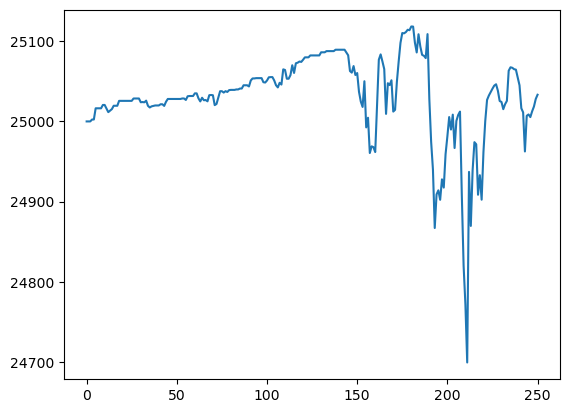

In [6]:
import matplotlib.pyplot as plt

plt.plot(results)